In [48]:
import numpy as np
import pandas as pd

from scipy import stats, linalg
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV    

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("./data/kc_house_data.csv") 

In [50]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [51]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# EXAMINATION OF THE TARGET VARIABLE 'PRICE'

## Using Log Transform to reduce skewness

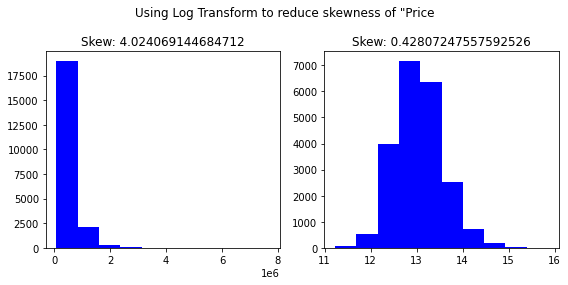

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize = (8,4))
fig.suptitle('Using Log Transform to reduce skewness of "Price')
ax1.hist(df["price"], color='blue')
ax1.title.set_text('Skew: ' + str(df["price"].skew()))
target = np.log(df.price)
ax2.hist(target, color='blue')
ax2.title.set_text('Skew: ' + str(target.skew()))
plt.show()

# HEATMAP TO VISUALIZE CORRELATION BETWEEN FEATURES AND "PRICE"

<AxesSubplot:>

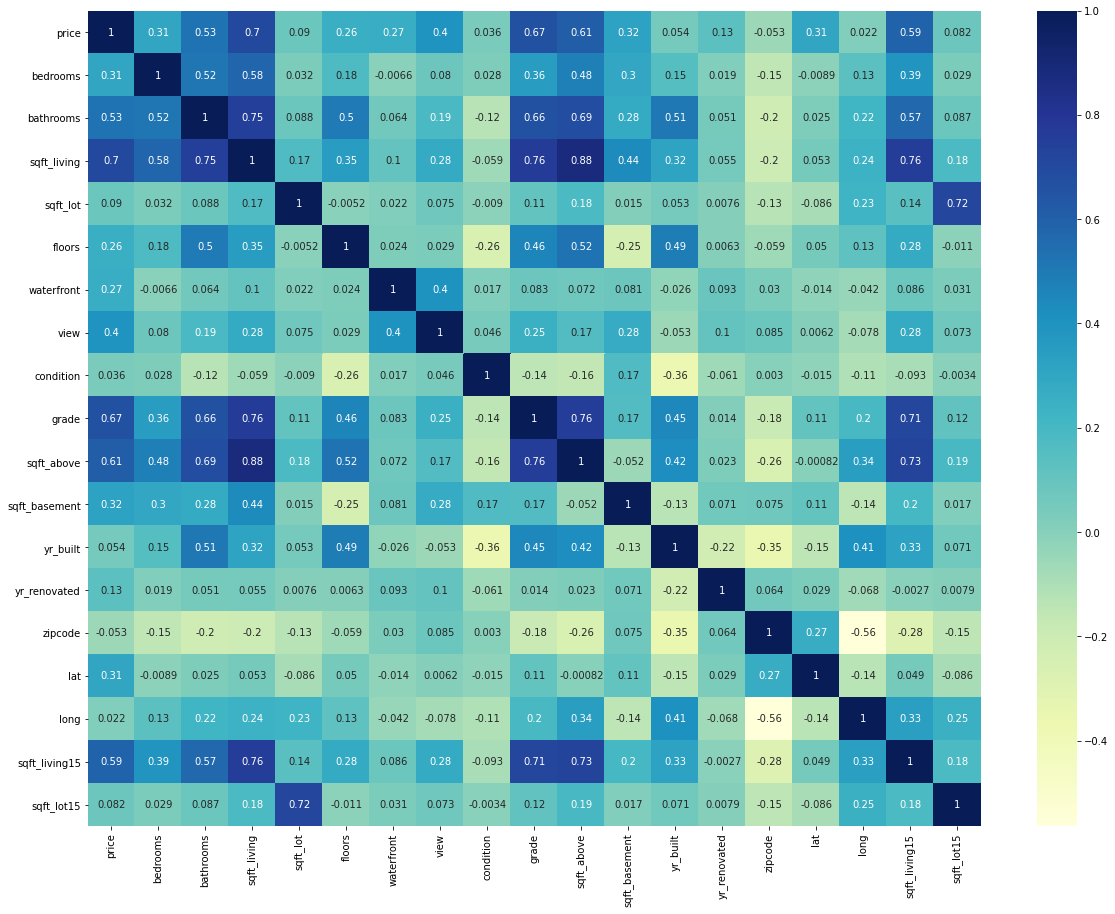

In [54]:
corr=df.corr().iloc[1:,1:]
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

## Feature 1.'Bedrooms'

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

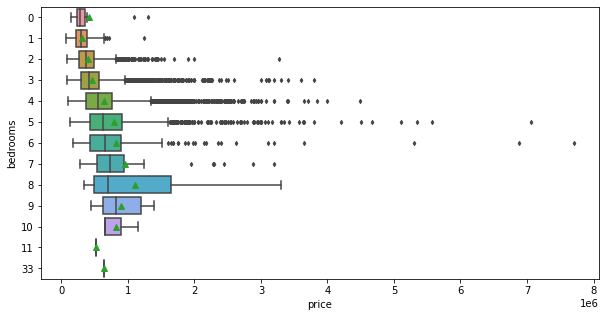

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)

In [56]:
df[df.bedrooms== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [57]:
df.drop(df.index[15870], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long  

## Features: 'Bathrooms','Floors','View','Condition','grade'

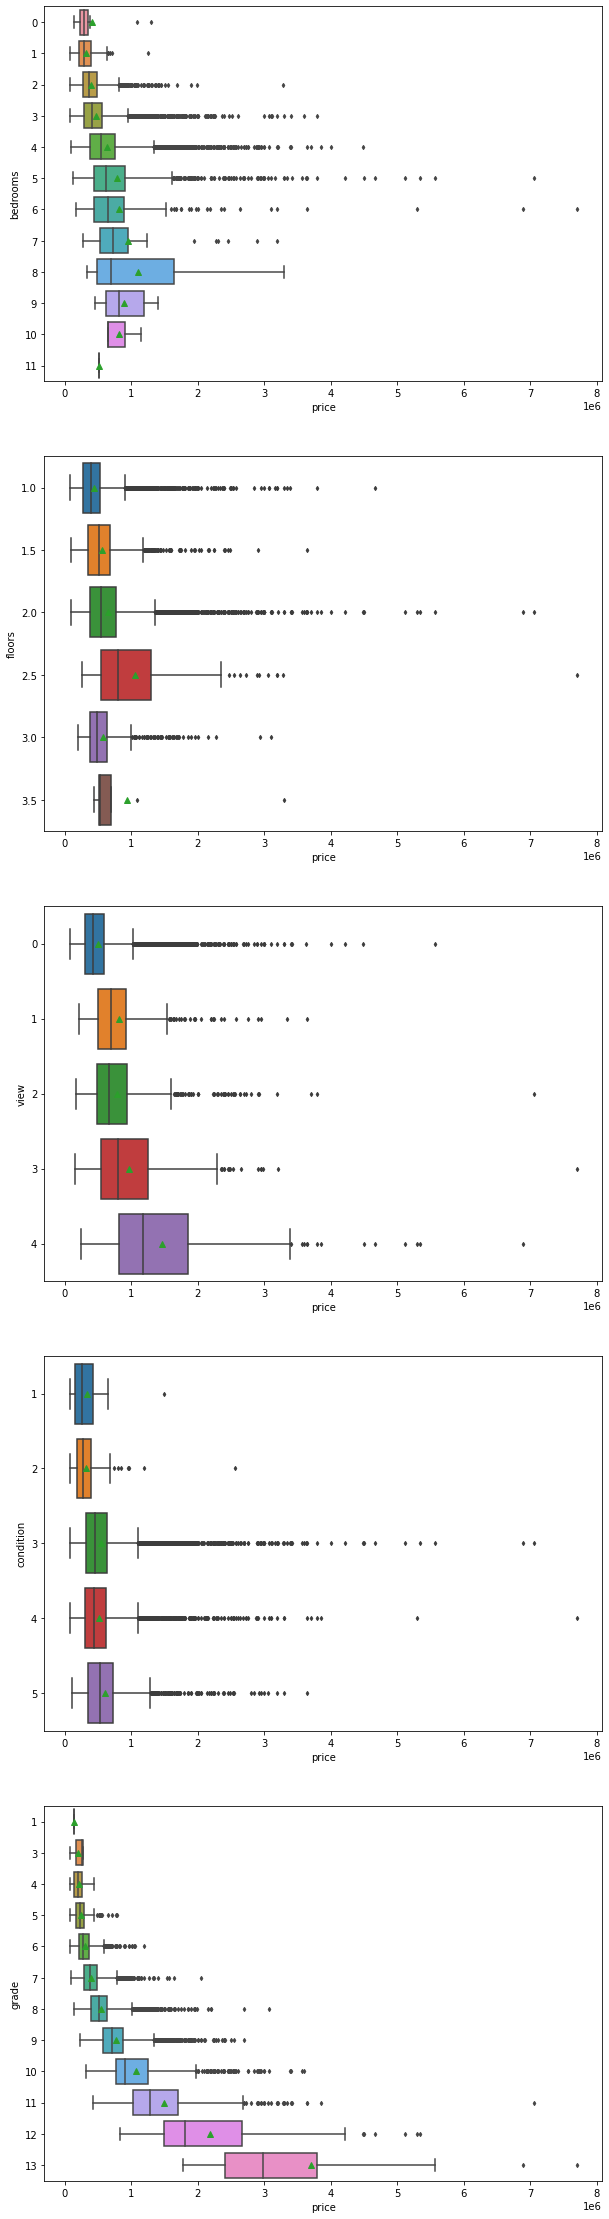

In [58]:
fig, axarr = plt.subplots(5, figsize=(10,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'view', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'grade', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

## Using Pearson's coefficient r to measures the strength and direction of the relationship between ordinal feature and the target variable

In [59]:
r,p = stats.spearmanr(df['bedrooms'], df['price'])
print ('spearman correlation r between price and bedrooms is %s with p=%s' %(r,p))
r, p = stats.spearmanr(df['bathrooms'], df['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['floors'], df['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['view'], df['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['condition'], df['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['grade'], df['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.3446096052541966 with p=0.0
spearman correlation r between price and bathrooms is 0.49719843078602993 with p = 0.0
spearman correlation r between price and floors is 0.3223956843803463 with p = 0.0
spearman correlation r between price and view is 0.2939452459084983 with p = 0.0
spearman correlation r between price and condition is 0.01841416481327438 with p = 0.006786500696462454
spearman correlation r between price and grade is 0.6582584376751184 with p = 0.0


## Features: 'Sqft_living', 'sqft_living15', 'sqft_above'

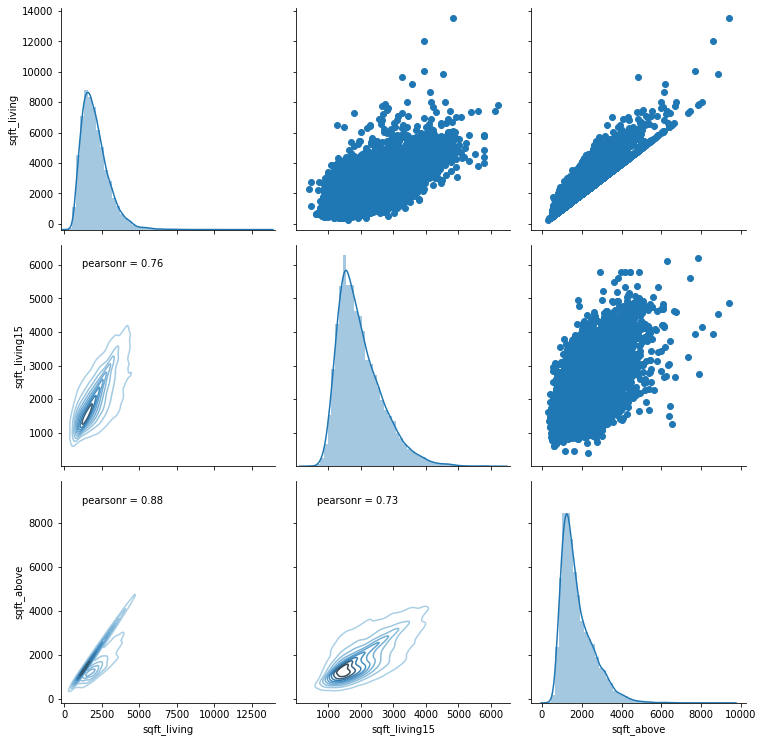

In [60]:
def corr_variables(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r), xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df, vars = ['sqft_living', 'sqft_living15', 'sqft_above'], size = 3.5)
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corr_variables)
plt.show()

# EXAMINATION OF DICOTOMOUS FEATURES (WITH UNDERLYING CONTINUOUS DISTRIBUTION) WITH THE TARGET VARIABLE

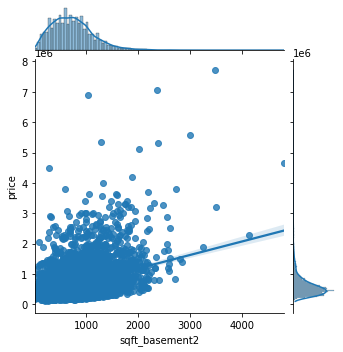

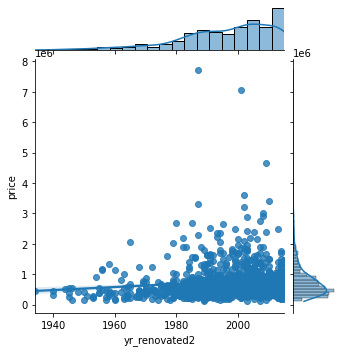

In [61]:
#Creating 2 new columns
df['sqft_basement2'] = df['sqft_basement'].apply(lambda x: x if x > 0 else None)
df['yr_renovated2'] = df['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=df, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=df, kind = 'reg', dropna=True, size = 5)
plt.show()

In [62]:
df['presence_of_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['presence_of_renovation'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,presence_of_basement,presence_of_renovation
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,NaN,NaN,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,400.0,1991.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,NaN,NaN,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,910.0,NaN,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,NaN,NaN,0,0


## Checking for association with the target variable

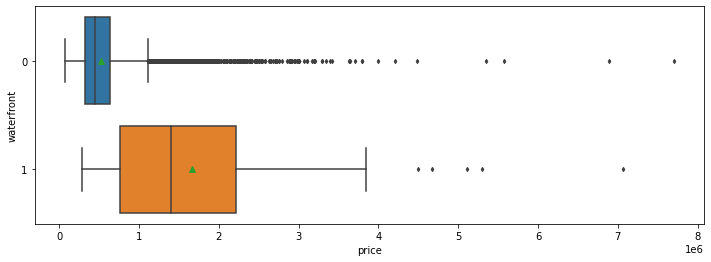

point biserial correlation r is 0.2663710350305645 with p = 0.0


In [63]:
# variable 'waterfront'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='waterfront', x='price', data=df, width=0.8, orient='h', showmeans=True, fliersize=3, ax=ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(df['waterfront'], df['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

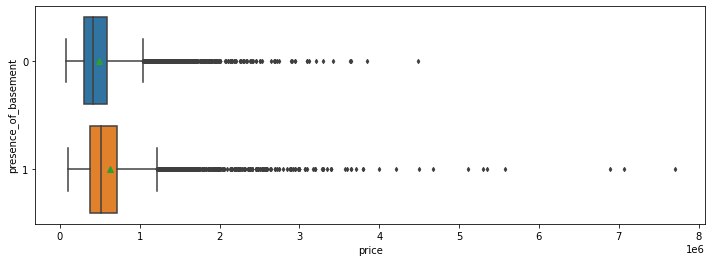

point biserial correlation r between price and presence_of_basement is 0.1802211836124588 with p = 3.4320595470050915e-157


In [64]:
# variable basement_present
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='presence_of_basement', x='price', data=df, width=0.8, orient='h', showmeans=True, fliersize=3, ax=ax)
plt.show()
r, p = stats.pointbiserialr(df['presence_of_basement'], df['price'])
print ('point biserial correlation r between price and presence_of_basement is %s with p = %s' %(r,p))

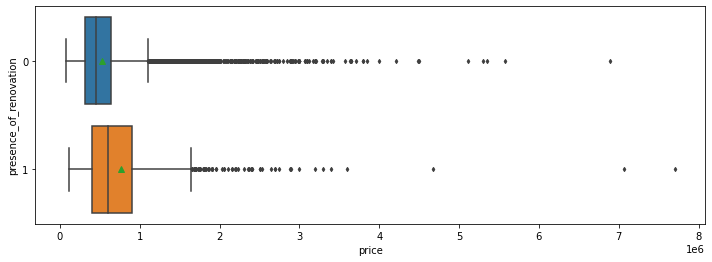

point biserial correlation r between price and presence_of_renovation is 0.1260952537449428 with p = 2.6394385400522764e-77


In [65]:
#variable 'renovated'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='presence_of_renovation', x='price', data=df, width=0.8, orient='h', showmeans=True, fliersize=3, ax=ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df['presence_of_renovation'], df['price'])
print ('point biserial correlation r between price and presence_of_renovation is %s with p = %s' %(r,p))

# DATA PREPARATION/PROCESSING

In [66]:
#Tranforming 'Date' to a datetime series.
df['Date']=pd.to_datetime(df['date'],format="%Y/%m/%d")
df['year'] = df['Date'].dt.year

#Creating column'property_age' from 'year_built' and 'year'.
df['property_age']=df['year']-df['yr_built']

#drop
df.drop('date', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('sqft_basement2',axis=1,inplace=True)
df.drop('yr_renovated2',axis=1,inplace=True)
df.drop('lat',axis=1,inplace=True)
df.drop('long',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,1340,5650,0,0,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,1690,7639,1,1,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,2720,8062,0,0,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,1360,5000,1,0,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,1800,7503,0,0,2015,28


In [68]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'presence_of_basement', 'presence_of_renovation', 'year',
       'property_age'],
      dtype='object')

In [69]:
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age,basement_present,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,1340,5650,0,0,2014,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,1690,7639,1,1,2014,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,2720,8062,0,0,2015,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,1360,5000,1,0,2014,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,1800,7503,0,0,2015,28,0,0


In [71]:
#Remove sqft_basement and yr_renovated
df.drop('sqft_basement',axis=1,inplace=True)
df.drop('yr_renovated',axis=1,inplace=True)

In [72]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age,basement_present,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,98178,1340,5650,0,0,2014,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,98125,1690,7639,1,1,2014,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,98028,2720,8062,0,0,2015,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,98136,1360,5000,1,0,2014,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,98074,1800,7503,0,0,2015,28,0,0


In [73]:
#creating dummy variables for columns 'view' and 'grade'
categorial_cols = ['view', 'grade']
for cc in categorial_cols:
    dummies = pd.get_dummies(df[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [74]:
#creating dummy variables for top 6 zipcoodes.
dummies_zipcodes = pd.get_dummies(df['zipcode'], drop_first=False)
dummies_zipcodes.reset_index(inplace=True)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}#".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040']]
df.drop('zipcode', axis=1, inplace=True)
df = df.join(dummies_zipcodes)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   21612 non-null  float64
 1   bedrooms                21612 non-null  int64  
 2   bathrooms               21612 non-null  float64
 3   sqft_living             21612 non-null  int64  
 4   sqft_lot                21612 non-null  int64  
 5   floors                  21612 non-null  float64
 6   waterfront              21612 non-null  int64  
 7   condition               21612 non-null  int64  
 8   sqft_above              21612 non-null  int64  
 9   yr_built                21612 non-null  int64  
 10  sqft_living15           21612 non-null  int64  
 11  sqft_lot15              21612 non-null  int64  
 12  presence_of_basement    21612 non-null  int64  
 13  presence_of_renovation  21612 non-null  int64  
 14  year                    21612 non-null

In [76]:
df.to_csv("./data/kc_house_data_FE.csv", index=False)
X = df[[ col for col in df.columns if col != "price"]]
y = np.log(df["price"])